In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df=pd.read_csv('Salary_Data.csv')
newdf=pd.read_csv('Salary_Data.csv')

In [2]:

df["Employment"].value_counts()


Employed, full-time                                                                                                                    42962
Student, full-time                                                                                                                      6756
Independent contractor, freelancer, or self-employed                                                                                    4978
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                3486
Not employed, but looking for work                                                                                                      1831
                                                                                                                                       ...  
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                                            1
Employed, ful

In [3]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [4]:
df=df[["Country","EdLevel","YearsCodePro","Employment","ConvertedCompYearly"]]
df=df.rename({"ConvertedCompYearly":"Salary"},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [5]:
df.isnull().sum()

Country          1497
EdLevel          1697
YearsCodePro    21435
Employment       1559
Salary          35197
dtype: int64

In [6]:
df=df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [7]:
df=df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37919 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37919 non-null  object 
 1   EdLevel       37919 non-null  object 
 2   YearsCodePro  37919 non-null  object 
 3   Employment    37919 non-null  object 
 4   Salary        37919 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [9]:
df["Employment"].value_counts()

Employed, full-time                                                                             31382
Independent contractor, freelancer, or self-employed                                             2739
Employed, full-time;Independent contractor, freelancer, or self-employed                         2633
Employed, part-time                                                                               632
Independent contractor, freelancer, or self-employed;Employed, part-time                          207
Employed, full-time;Employed, part-time                                                           151
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      118
I prefer not to say                                                                                27
Retired                                                                                            18
Employed, part-time;Retired                                                       

In [10]:
df["Employment"]=df["Employment"].str.replace("Employed, full-time","Employed Full Time")
df["Employment"].value_counts()

Employed Full Time                                                                             31382
Independent contractor, freelancer, or self-employed                                            2739
Employed Full Time;Independent contractor, freelancer, or self-employed                         2633
Employed, part-time                                                                              632
Independent contractor, freelancer, or self-employed;Employed, part-time                         207
Employed Full Time;Employed, part-time                                                           151
Employed Full Time;Independent contractor, freelancer, or self-employed;Employed, part-time      118
I prefer not to say                                                                               27
Retired                                                                                           18
Employed, part-time;Retired                                                                

In [11]:
df=df[df["Employment"]=="Employed Full Time"]
df["Employment"].value_counts()

Employed Full Time    31382
Name: Employment, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Employment    31382 non-null  object 
 4   Salary        31382 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [13]:
df=df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [14]:
df["Country"].value_counts()

United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: Country, Length: 155, dtype: int64

In [15]:
def shorten_categories(categories,cutoff):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>cutoff:
            categorical_map[categories.index[i]]=categories.index[i]
        else:
            categorical_map[categories.index[i]]="Other"
    return categorical_map

In [16]:
country_map=shorten_categories(df["Country"].value_counts(),400)
df["Country"]=df["Country"].map(country_map)
df.Country.value_counts()

Other                                                   8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: Country, dtype: in

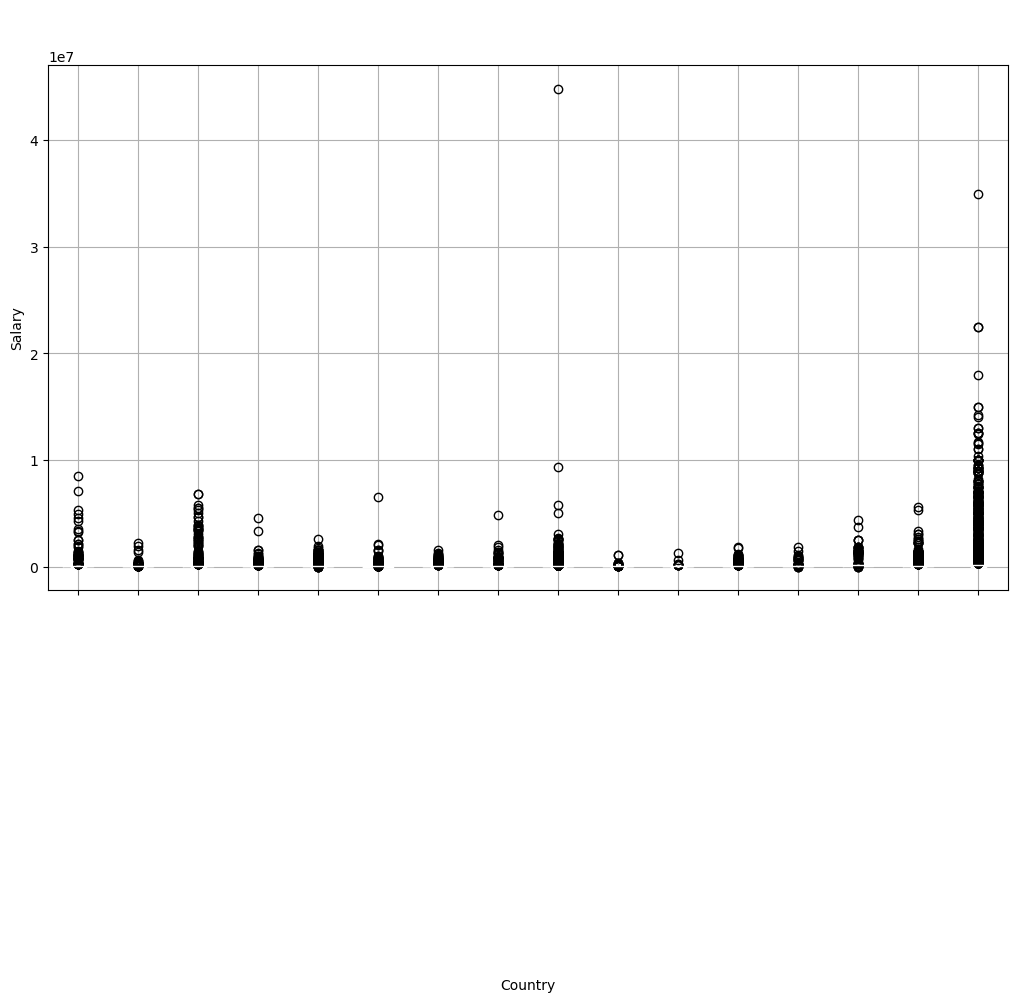

In [17]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
#Change Text to White
plt.rcParams['text.color'] = 'white'
df.boxplot("Salary","Country",ax=ax,color="white")
plt.suptitle("Salary (USD) by Country",fontsize=20)
plt.title('')
plt.ylabel("Salary")
plt.rcParams['text.color'] = 'white'
plt.xticks(rotation=90)
plt.xticks(color='white')
plt.show()



In [18]:
df=df[df["Salary"]<=250000]
df=df[df["Salary"]>=10000]
df=df[df["Country"]!="Other"]

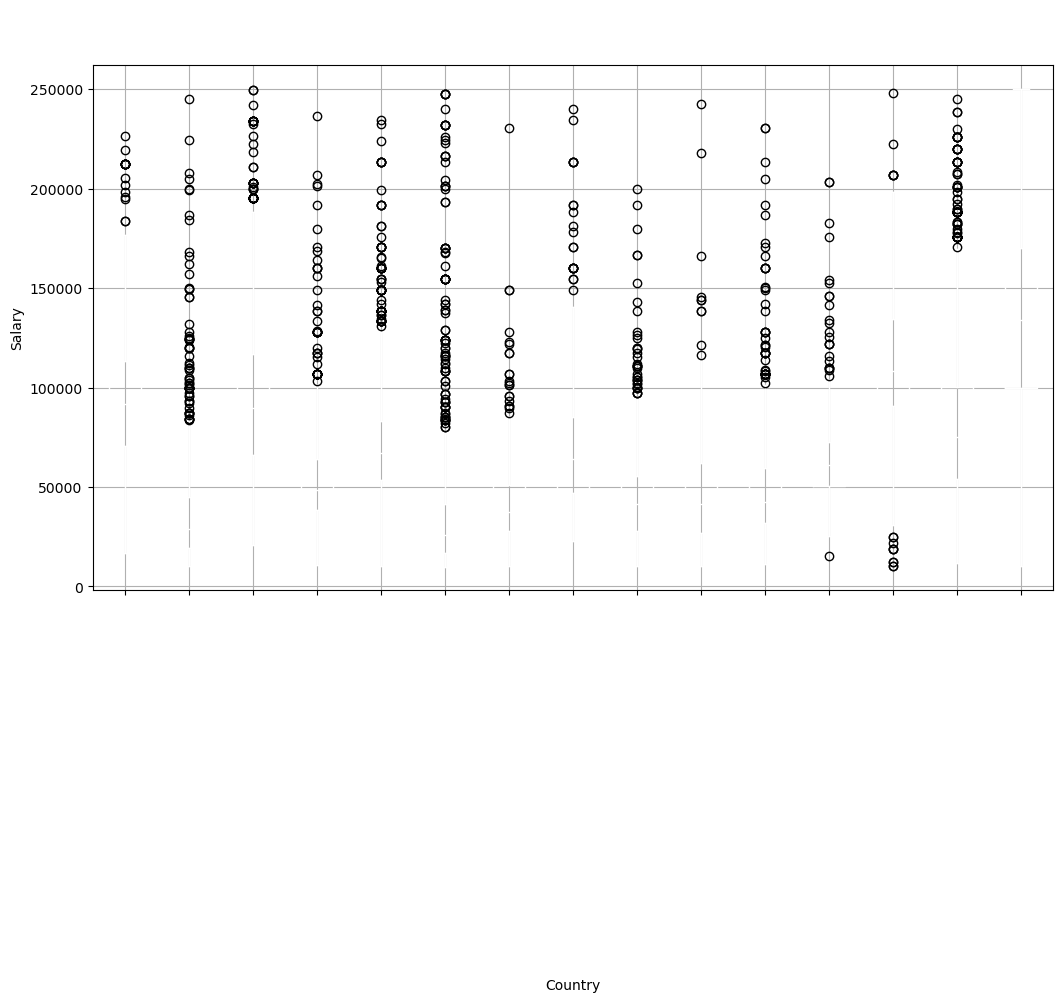

In [19]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
#Change Text to White
plt.rcParams['text.color'] = 'white'
df.boxplot("Salary","Country",ax=ax,color="white")
plt.suptitle("Salary (USD) by Country",fontsize=20)
plt.title('')
plt.ylabel("Salary")
plt.rcParams['text.color'] = 'white'
plt.xticks(rotation=90)
plt.xticks(color='white')
plt.show()

In [20]:
df["YearsCodePro"].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [21]:
def clean_experience(x):
    if x=="Less than 1 year":
        return 0.5
   
    if x=="More than 50 years":
        return 50.0
    return float(x)

        
df['YearsCodePro']=df['YearsCodePro'].apply(clean_experience)

In [22]:
df["YearsCodePro"].unique()
#Drop YearsCodePro null values
df=df[df["YearsCodePro"].notnull()]
df["YearsCodePro"].unique()


array([ 5. ,  6. ,  2. ,  4. , 20. ,  9. , 14. , 21. , 15. , 25. ,  3. ,
       10. ,  8. , 12. ,  7. , 19. , 17. , 24. ,  1. , 11. , 23. ,  0.5,
       18. , 37. , 46. , 22. , 32. , 13. , 27. , 28. , 16. , 31. , 34. ,
       35. , 26. , 42. , 38. , 30. , 36. , 40. , 41. , 29. , 33. , 39. ,
       48. , 45. , 44. , 43. , 50. , 47. , 49. ])

In [23]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [24]:
def clean_education(x):
    if x=="Bachelor’s degree (B.A., B.S., B.Eng., etc.)":
        return "Bachelor's Degree"
    elif x=="Master’s degree (M.A., M.S., M.Eng., MBA, etc.)":
        return "Master's Degree"
    elif x=="Some college/university study without earning a degree":
        return "Some College"
    elif x=="Other doctoral degree (Ph.D., Ed.D., etc.)":
        return "Doctorate"
    elif x=="Associate degree":
        return "Associate"
    elif x=="Professional degree (JD, MD, etc.)":
        return "Professional"
    elif x=="Primary/elementary school":
        return "Elementary"
    elif x=="I never completed any formal education":
        return "No Formal Education"
    else:
        return "Other"
df["EdLevel"]=df["EdLevel"].apply(clean_education)

In [25]:
df["EdLevel"].unique()

array(["Master's Degree", "Bachelor's Degree", 'Other', 'Some College',
       'Professional', 'Doctorate', 'Elementary'], dtype=object)

In [26]:
df["Country"].unique()

array(['United Kingdom of Great Britain and Northern Ireland',
       'Netherlands', 'United States of America', 'Italy', 'Canada',
       'Germany', 'Poland', 'France', 'Brazil', 'Sweden', 'Spain',
       'India', 'Switzerland', 'Australia', 'Russian Federation'],
      dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
le_education=LabelEncoder()
df["EdLevel"]=le_education.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([3, 0, 4, 6, 5, 1, 2])

In [28]:
le_country=LabelEncoder()
df["Country"]=le_country.fit_transform(df["Country"])
df["Country"].unique()

array([13,  7, 14,  6,  2,  4,  8,  3,  1, 11, 10,  5, 12,  0,  9])

In [29]:
X=df.drop("Salary",axis=1)
y=df["Salary"]

In [30]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X,y.values)

LinearRegression()

In [31]:
y_pred=linear_reg.predict(X)

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
error= np.sqrt(mean_squared_error(y,y_pred))

In [33]:
error

44542.88953376534

In [34]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg=DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X,y.values)

DecisionTreeRegressor(random_state=0)

In [35]:
y_pred=dec_tree_reg.predict(X)

In [36]:
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$33,159.07


In [37]:
from sklearn.ensemble import RandomForestRegressor
rand_forest_reg=RandomForestRegressor(n_estimators=100,random_state=0)
rand_forest_reg.fit(X,y.values)

RandomForestRegressor(random_state=0)

In [38]:
y_pred=rand_forest_reg.predict(X)

In [39]:
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$33,281.61


In [40]:
from sklearn.model_selection import GridSearchCV

max_depth=[None,2,4,6,8,10,12]
parameters={"max_depth":max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs=GridSearchCV(regressor,parameters,scoring="neg_mean_squared_error")
gs.fit(X,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [41]:
regressor = gs.best_estimator_
regressor.fit(X,y.values)
y_pred= regressor.predict(X)
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$34,824.31


In [42]:
X

,Country,EdLevel,YearsCodePro
2,13,3,5.0
8,7,3,6.0
10,13,0,2.0
12,14,0,5.0
21,6,3,4.0
...,...,...,...
73113,14,3,5.0
73116,14,0,16.0
73119,14,0,1.0
73120,10,0,2.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19884 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       19884 non-null  int64  
 1   EdLevel       19884 non-null  int64  
 2   YearsCodePro  19884 non-null  float64
 3   Salary        19884 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 776.7 KB


In [44]:
X=np.array([["United States of America","Master's Degree",15]])
X

array([['United States of America', "Master's Degree", '15']],
      dtype='<U24')

In [45]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[14.,  3., 15.]])

In [46]:
y_pred=regressor.predict(X)
y_pred

/Users/toluodunuga/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([165321.55140187])

In [47]:
import pickle

In [48]:
data={"model":regressor,"le_country":le_country,"le_education":le_education}
with open("salary_model.pkl","wb") as file:
    pickle.dump(data,file)

In [49]:
with open("salary_model.pkl","rb") as file:
    data=pickle.load(file)

regressor_loaded=data["model"]
le_country_loaded=data["le_country"]
le_education_loaded=data["le_education"]

In [50]:
y_pred=regressor_loaded.predict(X)
y_pred

/Users/toluodunuga/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([165321.55140187])